In [ ]:
// TASK 01 //

In [15]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [16]:
df= pd.read_csv("C:/Users/Computer Link/Contacts/Desktop/Loan_Default.csv")

In [17]:
df.head(10)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,...,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0


In [18]:

df.drop_duplicates(inplace=True)


In [19]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [30]:
# Fill numerical missing values with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical missing values with mode
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [31]:
le = LabelEncoder()


In [35]:
X = df[['LTV', 'year', 'Credit_Score']]
y= df ['submission_of_application']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [37]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))


Logistic Regression Results
[[    1 10530]
 [    1 19202]]
              precision    recall  f1-score   support

    not_inst       0.50      0.00      0.00     10531
     to_inst       0.65      1.00      0.78     19203

    accuracy                           0.65     29734
   macro avg       0.57      0.50      0.39     29734
weighted avg       0.59      0.65      0.51     29734



NameError: name 'f1_score' is not defined

In [41]:
X_cb = df.drop( "Credit_Score", axis=1)
y_cb = df["submission_of_application"]

cat_features = X_cb.select_dtypes(include="object").columns.tolist()

X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(
    X_cb, y_cb, test_size=0.2, random_state=42, stratify=y_cb
)

cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    verbose=0
)

cat_model.fit(X_train_cb, y_train_cb, cat_features=cat_features)

y_pred_cb = cat_model.predict(X_test_cb)

print("CatBoost Results")
print(confusion_matrix(y_test_cb, y_pred_cb))
print(classification_report(y_test_cb, y_pred_cb))
print("F1 Score:", f1_score(y_test_cb, y_pred_cb))


NameError: name 'CatBoostClassifier' is not defined

In [42]:
# Example business costs
cost_fp = 1000   # False positive: incorrectly rejecting a good loan
cost_fn = 10000  # False negative: approving a loan that defaults


In [43]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities for positive class
y_prob = model.predict_proba(X_test)[:, 1]

In [44]:

thresholds = np.linspace(0, 1, 101)
total_cost = []

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    
    fp = np.sum((y_pred == 1) & (y_test == 0))
    fn = np.sum((y_pred == 0) & (y_test == 1))
    
    cost = fp * cost_fp + fn * cost_fn
    total_cost.append(cost)

In [45]:
best_idx = np.argmin(total_cost)
best_threshold = thresholds[best_idx]
min_cost = total_cost[best_idx]

print("Best Threshold:", best_threshold)
print("Minimum Total Business Cost:", min_cost)

Best Threshold: 0.0
Minimum Total Business Cost: 0


In [46]:
y_pred_best = (y_prob >= best_threshold).astype(int)


In [ ]:
// task 02 //

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [53]:
df= pd.read_csv("C:/Users/Computer Link/Contacts/Desktop/Mall_Customers.csv")

In [54]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [56]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [57]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


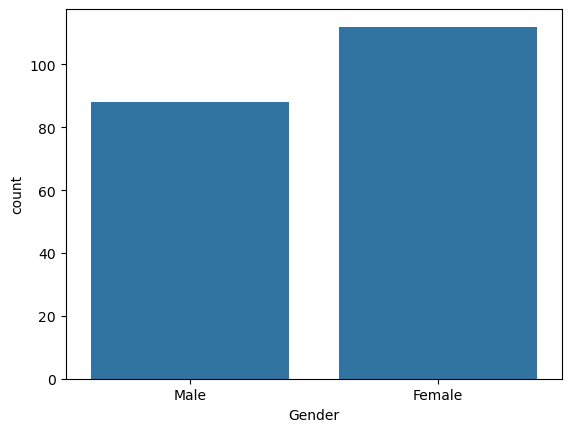

In [58]:
sns.countplot(x='Gender', data=df)
plt.show()

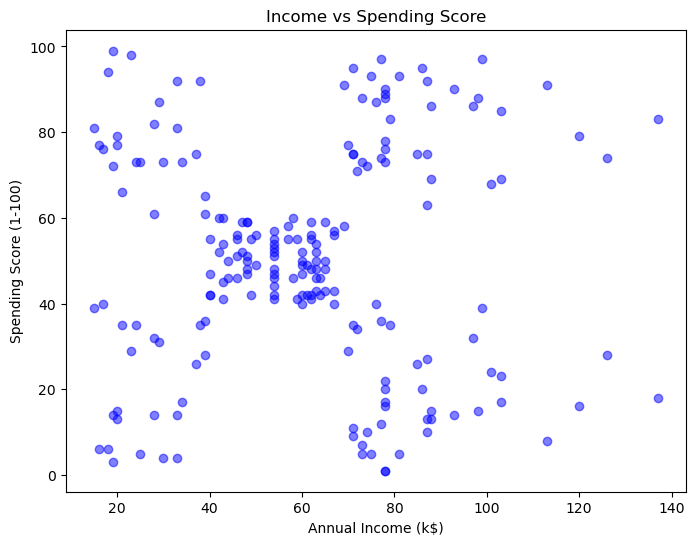

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c='blue', alpha=0.5)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Income vs Spending Score")
plt.show()


In [60]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\an\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\an\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\an\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\an\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

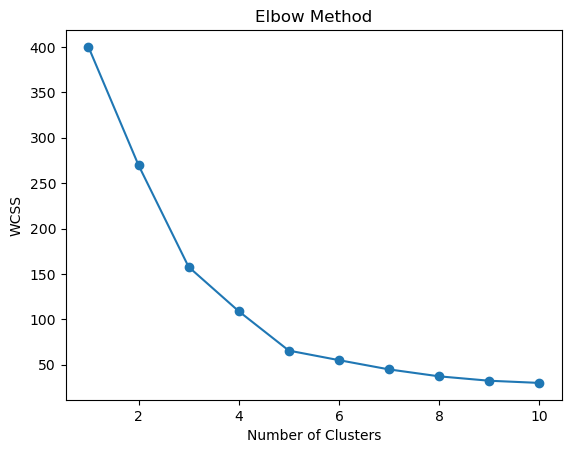

In [61]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [62]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


C:\an\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


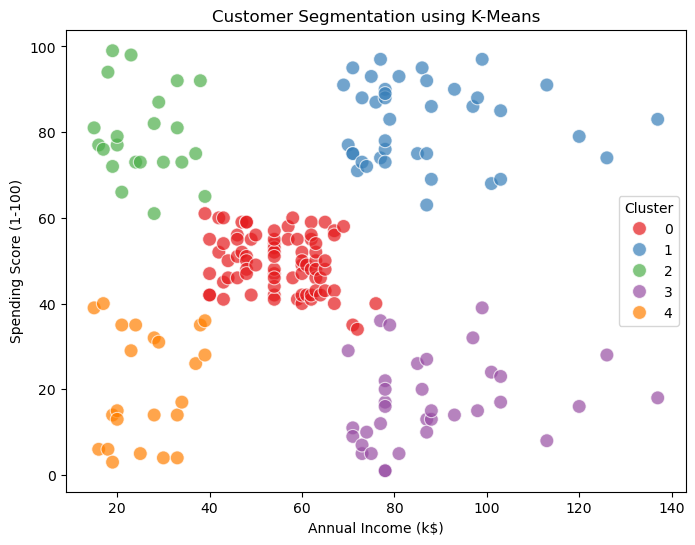

In [63]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=100,
    alpha=0.7
)
plt.title("Customer Segmentation using K-Means")
plt.show()


In [64]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


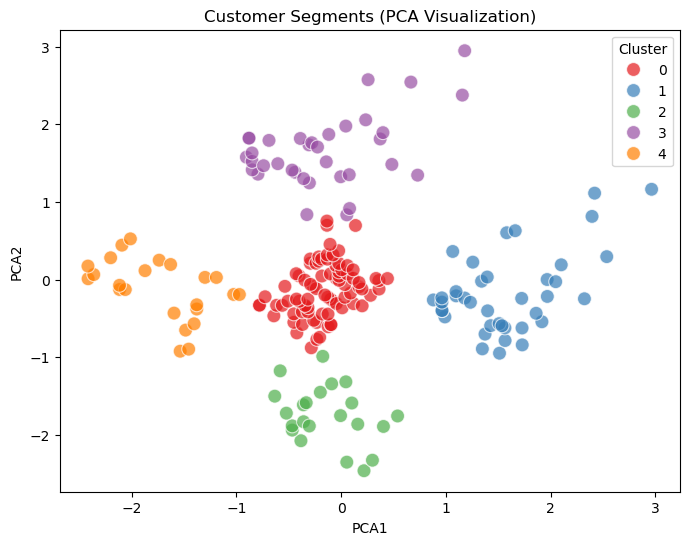

In [65]:
# PCA to reduce features to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to dataframe for plotting
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=100,
    alpha=0.7
)
plt.title("Customer Segments (PCA Visualization)")
plt.show()


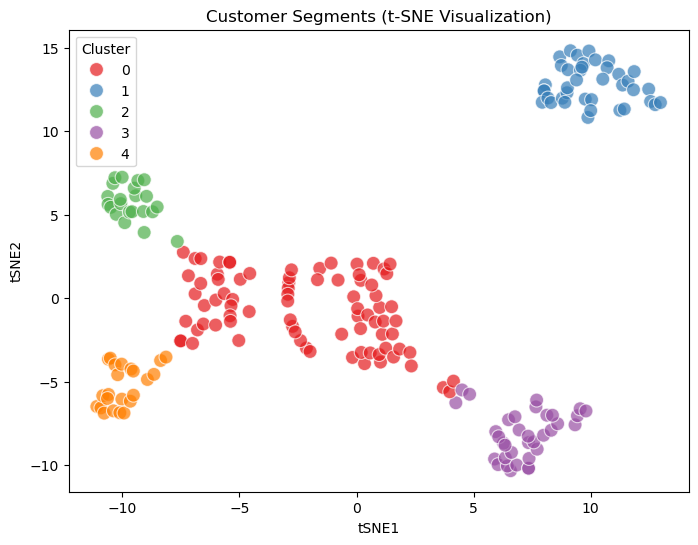

In [66]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

df['tSNE1'] = X_tsne[:, 0]
df['tSNE2'] = X_tsne[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='tSNE1', y='tSNE2',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=100,
    alpha=0.7
)
plt.title("Customer Segments (t-SNE Visualization)")
plt.show()


In [67]:
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [ ]:
// TASK 03 //

In [74]:
import streamlit as st


In [75]:
df= pd.read_csv("C:/Users/Computer Link/Contacts/Desktop/superstore.csv")

In [76]:
df.head(10)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
5,Office Supplies,Los Angeles,United States,JF-154904,Jeremy Farry,0.0,US,1,2011-10-19 00:00:00.000,CA-2011-117317,...,13,Consumer,2011-10-19 00:00:00.000,Same Day,2.39,California,Paper,2011,North America,43
6,Office Supplies,Los Angeles,United States,WB-218504,William Brown,0.0,US,1,2011-11-04 00:00:00.000,CA-2011-125829,...,19,Consumer,2011-11-11 00:00:00.000,Standard Class,1.15,California,Paper,2011,North America,45
7,Office Supplies,Los Angeles,United States,JA-159704,Joseph Airdo,0.0,US,1,2011-11-12 00:00:00.000,CA-2011-151295,...,12,Consumer,2011-11-16 00:00:00.000,Standard Class,0.92,California,Paper,2011,North America,46
8,Office Supplies,Los Angeles,United States,SP-209204,Susan Pistek,0.0,US,1,2011-11-22 00:00:00.000,CA-2011-135090,...,54,Consumer,2011-11-26 00:00:00.000,Standard Class,6.98,California,Paper,2011,North America,48
9,Office Supplies,Los Angeles,United States,RL-196154,Rob Lucas,0.0,US,1,2011-12-05 00:00:00.000,CA-2011-133830,...,49,Consumer,2011-12-10 00:00:00.000,Standard Class,1.99,California,Paper,2011,North America,50


In [77]:
df.drop_duplicates(inplace=True)
df = df.dropna(subset=['Region', 'Category', 'Sub.Category', 'Sales', 'Profit'])
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [78]:
st.title("Superstore Sales Dashboard")

2025-12-31 03:35:11.518 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:35:12.318 
  command:

    streamlit run C:\an\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-31 03:35:12.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [80]:
region_filter = st.sidebar.multiselect("Select Region", df['Region'].unique(), default=df['Region'].unique())
category_filter = st.sidebar.multiselect("Select Category", df['Category'].unique(), default=df['Category'].unique())
subcategory_filter = st.sidebar.multiselect("Select Sub.Category", df['Sub.Category'].unique(), default=df['Sub.Category'].unique())


2025-12-31 03:35:28.596 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:35:28.597 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:35:28.600 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:35:28.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:35:28.603 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:35:28.615 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:35:28.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:35:28.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [82]:
filtered_data = df[
    (df['Region'].isin(region_filter)) &
    (df['Category'].isin(category_filter)) &
    (df['Sub.Category'].isin(subcategory_filter))
]

st.subheader("Filtered Data")
st.dataframe(filtered_data)

2025-12-31 03:36:11.133 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:36:11.134 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:36:11.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:36:11.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [83]:
st.subheader("Summary Metrics")
st.metric("Total Sales", f"${filtered_data['Sales'].sum():,.2f}")
st.metric("Total Profit", f"${filtered_data['Profit'].sum():,.2f}")
st.metric("Average Profit Ratio", f"{(filtered_data['Profit'].sum()/filtered_data['Sales'].sum()*100):.2f}%")

2025-12-31 03:36:31.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:36:31.699 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:36:31.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:36:31.702 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:36:31.704 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:36:31.705 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:36:31.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:36:31.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

2025-12-31 03:36:47.785 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:36:47.787 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
C:\Users\Computer Link\AppData\Local\Temp\ipykernel_12744\1084150863.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=filtered_data, ci=None)
2025-12-31 03:36:48.249 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:36:48.640 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:36:48.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

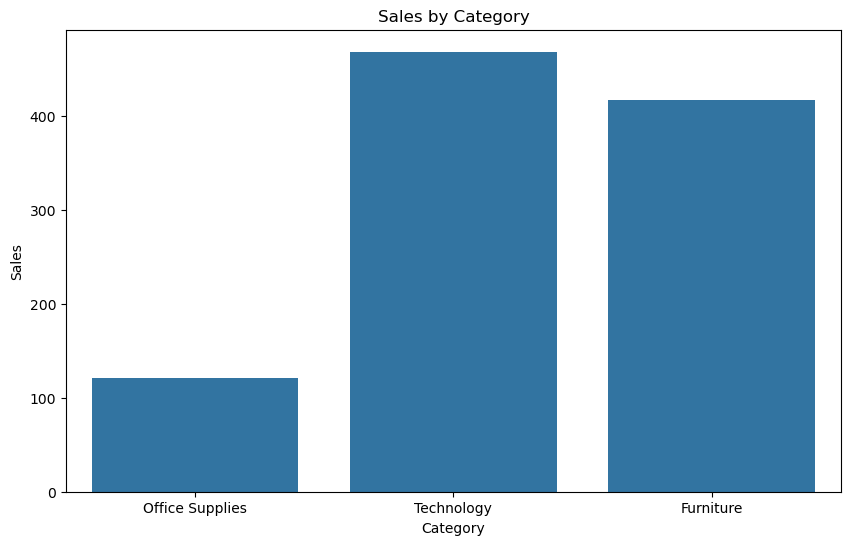

In [84]:
st.subheader("Sales vs Profit by Category")
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', data=filtered_data, ci=None)
plt.title("Sales by Category")
st.pyplot(plt.gcf())

In [86]:
st.subheader("Profit vs Sub.Category")
plt.figure(figsize=(12,6))
sns.barplot(x='Sub.Category', y='Profit', data=filtered_data, ci=None)
plt.title("Profit by Sub.Category")
plt.xticks(rotation=45)
st.pyplot(plt.gcf())

2025-12-31 03:37:31.460 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:37:31.461 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
C:\Users\Computer Link\AppData\Local\Temp\ipykernel_12744\1142147860.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub.Category', y='Profit', data=filtered_data, ci=None)
2025-12-31 03:37:31.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:37:32.323 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:37:32.325 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [87]:
total_sales = df['Sales'].sum()
st.metric("Total Sales", f"${total_sales:,.2f}")

2025-12-31 03:40:00.237 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:40:00.239 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [88]:
total_profit = df['Profit'].sum()
st.metric("Total Profit", f"${total_profit:,.2f}")


2025-12-31 03:40:12.048 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-31 03:40:12.049 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [90]:
top_customers = df.groupby('Customer.Name')['Sales'].sum().sort_values(ascending=False).head(5)